# Word Embedding using Keras

In [ ]:
#importing libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

In [ ]:
#reviewing words
reviews = ['nice place',
           'pleasant area',
           'calm environment',
           'beautiful place',
           'bad place',
           'polluted region',
           'noisy area',
           'high traffic']
sentiment = np.array([1,1,1,1,0,0,0,0])

In [ ]:
one_hot("calm environment", 10)

[6, 6]

In [ ]:
#encoding the reviews
vocab_size = 30
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
encoded_reviews

[[6, 17], [18, 10], [4, 3], [24, 17], [12, 17], [1, 17], [24, 10], [22, 26]]

In [ ]:
#applying padding
max_length = 3
padded_reviews = pad_sequences(encoded_reviews, maxlen = max_length, padding = 'post')
padded_reviews

array([[ 6, 17,  0],
       [18, 10,  0],
       [ 4,  3,  0],
       [24, 17,  0],
       [12, 17,  0],
       [ 1, 17,  0],
       [24, 10,  0],
       [22, 26,  0]], dtype=int32)

In [ ]:
#model building for word embedding
embedded_vec_size = 5

model = Sequential()
model.add(Embedding(vocab_size, embedded_vec_size, input_length = max_length, name = "embedding"))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
x = padded_reviews
y = sentiment

In [ ]:
#compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#fitting the model
model.fit(x,y, epochs = 50, verbose = 1)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.6910 - accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.6900 - accuracy: 0.6250
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6891 - accuracy: 0.7500
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6882 - accuracy: 0.7500
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6873 - accuracy: 0.7500
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6864 - accuracy: 0.7500
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6855 - accuracy: 0.7500
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6846 - accuracy: 0.7500
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6837 - accuracy: 0.7500
Epoch 10/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6827 - accuracy: 0.7500
Epoch 11/50
1/1 [==============

In [ ]:
#evaluation
model.evaluate(x,y)

1/1 [==============================] - 0s 264ms/step - loss: 0.6429 - accuracy: 1.0000


[0.6429213881492615, 1.0]

In [ ]:
pred = (model.predict(x) > 0.5).astype("int32")
pred

1/1 [==============================] - 0s 104ms/step


array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
#calculating the weights
weights= model.get_layer('embedding').get_weights()[0]
weights

array([[ 0.01605831,  0.00249401,  0.0107154 , -0.00243213,  0.02740923],
       [-0.05580999,  0.05389724, -0.07739604,  0.04190858,  0.06566624],
       [ 0.02621723, -0.02661306, -0.04997851, -0.01049153, -0.04874466],
       [-0.004437  ,  0.06891614,  0.03278451, -0.05149412,  0.01077721],
       [ 0.07162955, -0.02116637,  0.06065736, -0.07256313, -0.06218875],
       [-0.03948475, -0.04451885, -0.04888883, -0.01552894,  0.01136402],
       [ 0.04889416, -0.01413414,  0.0744888 , -0.10091732, -0.08724939],
       [ 0.02935943,  0.01714451, -0.00621132, -0.02965462,  0.0421449 ],
       [ 0.04753598,  0.04094732,  0.0156793 , -0.00184043,  0.01795899],
       [-0.01151204, -0.01728791, -0.03832448, -0.02326291, -0.00177424],
       [ 0.05964391, -0.04348279, -0.03294867,  0.01823804, -0.07234586],
       [-0.02975421, -0.02243744, -0.01602696, -0.02375921, -0.04011689],
       [-0.04364555,  0.01151405, -0.09590204,  0.01102822,  0.02784275],
       [ 0.01871597,  0.03373751, -0.0

In [ ]:
len(weights)

30

In [ ]:
weights[2]

array([ 0.02621723, -0.02661306, -0.04997851, -0.01049153, -0.04874466],
      dtype=float32)

In [ ]:
weights[5]

array([-0.03948475, -0.04451885, -0.04888883, -0.01552894,  0.01136402],
      dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#confusion matrix
conf_matrix = confusion_matrix(y, pred)
conf_matrix

array([[4, 0],
       [0, 4]])

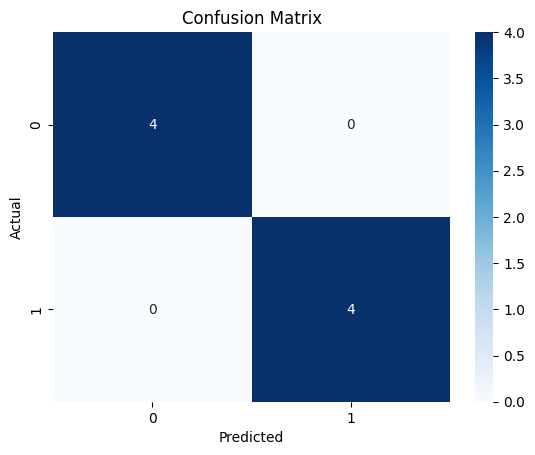

In [ ]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Word embeddings using Word2Vec

In [ ]:
#importing libraries
import gensim
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the dataset
df = pd.read_csv("/content/drive/MyDrive/AIML/Resume.csv")
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [ ]:
df.shape

(2484, 4)

In [ ]:
df.Resume_str[4]

'         HR MANAGER         Skill Highlights           HR SKILLS  HR Department Startup  Three New Organization Startups  Employment Law  FMLA/ADA/EEO/WC  Mediation & Advocacy  HR Policies & Procedures\t*Staff Recruitment & Retention  Salary Negotiations  Employee Relations  Benefits Administration  Unemployment Administration  Worker\'s Compensation Administration  Orientation & On-Boarding  HRIS Technologies  Training & Development  Performance Management  Organizational Development  HR Program/Project Management  HRIS applications (Lawson, Paychex, Kronos, ADP)  MS Office (Word, Excel, PowerPoint, Publisher, Access, Visio, Outlook)                Professional Experience      HR Manager     Jan 2015   to   Current      Company Name   －   City  ,   State     Manage the Human Resource function for e-Cycle\'s corporate office as well as their fulfillment and data center, consisting of benefits and compensation administration, payroll, employee relations, policy compliance, and recruitm

In [ ]:
#preprocess and tokenize the Resume_str
from gensim.utils import simple_preprocess
resume_txt = df['Resume_str'].apply(lambda x: simple_preprocess(x))

In [ ]:
resume_txt

0       [hr, administrator, marketing, associate, hr, ...
1       [hr, specialist, us, hr, operations, summary, ...
2       [hr, director, summary, over, years, experienc...
3       [hr, specialist, summary, dedicated, driven, a...
4       [hr, manager, skill, highlights, hr, skills, h...
                              ...                        
2479    [rank, sgt, non, commissioned, officer, in, ch...
2480    [government, relations, communications, and, o...
2481    [geek, squad, agent, professional, profile, it...
2482    [program, director, office, manager, summary, ...
2483    [storekeeper, ii, professional, summary, the, ...
Name: Resume_str, Length: 2484, dtype: object

In [ ]:
#model building
model = gensim.models.Word2Vec(window = 10, min_count = 2, workers = 4)

In [ ]:
#building the vocabulary by flattening the tokenized words
model.build_vocab(resume_txt, progress_per = 1000)

In [ ]:
model.epochs

5

In [ ]:
#train the model
model.train(resume_txt, total_examples=model.corpus_count, epochs = model.epochs)

(7917347, 9592905)

In [ ]:
#similarity check
model.wv.most_similar("technology")

[('systems', 0.6566202044487),
 ('technologies', 0.5780764818191528),
 ('clm', 0.5569081902503967),
 ('engineering', 0.5381489992141724),
 ('economies', 0.5350645184516907),
 ('dissemination', 0.5296223759651184),
 ('architecture', 0.5292964577674866),
 ('global', 0.5195398926734924),
 ('himss', 0.5170977115631104),
 ('siia', 0.5167378783226013)]